In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# load dataset
path = '/content/drive/My Drive/HK7/Seminar/W E E K 0 2 - 190920/Data/Bank Marketing/bank-additional-full.csv'
data = pd.read_csv(path, sep = ';')

In [4]:
# data sample inspection
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
# Export excel 
#data.to_excel('/content/drive/My Drive/HK7/Seminar/W E E K 0 3 - 071020/Bank_Additional_Full.xlsx', sheet_name='Sep')

In [ ]:
for col in data.columns:
  print(col.upper())
  counts = data[col].value_counts()
  percent100 = data[col].value_counts(normalize=True).mul(100).round(3).astype(str) + '%'
  col=pd.DataFrame({'counts': counts, 'Percent': percent100})
  print(col)
  print()
  print()

AGE
    counts Percent
31    1947  4.727%
32    1846  4.482%
33    1833   4.45%
36    1780  4.322%
35    1759  4.271%
..     ...     ...
89       2  0.005%
91       2  0.005%
87       1  0.002%
94       1  0.002%
95       1  0.002%

[78 rows x 2 columns]


JOB
               counts  Percent
admin.          10422  25.303%
blue-collar      9254  22.468%
technician       6743  16.371%
services         3969   9.636%
management       2924   7.099%
retired          1720   4.176%
entrepreneur     1456   3.535%
self-employed    1421    3.45%
housemaid        1060   2.574%
unemployed       1014   2.462%
student           875   2.124%
unknown           330   0.801%


MARITAL
          counts  Percent
married    24928  60.522%
single     11568  28.086%
divorced    4612  11.197%
unknown       80   0.194%


EDUCATION
                     counts  Percent
university.degree     12168  29.543%
high.school            9515  23.101%
basic.9y               6045  14.677%
professional.course    5243  12.729%

In [ ]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
# Encode
data1 = data.copy()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

col1 = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']

for i in col1:
  name = i+'_le'
  data1[name] = le.fit_transform(data1[i])

data1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_le,marital_le,education_le,default_le,housing_le,loan_le,contact_le,month_le,day_of_week_le,poutcome_le,y_le
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,3,1,0,0,0,0,1,6,1,1,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,7,1,3,1,0,0,1,6,1,1,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,7,1,3,0,2,0,1,6,1,1,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,1,1,0,0,0,1,6,1,1,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,7,1,3,0,0,2,1,6,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,5,1,5,0,2,0,0,7,0,1,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,1,1,5,0,0,0,0,7,0,1,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,5,1,6,0,2,0,0,7,0,1,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,9,1,5,0,0,0,0,7,0,1,1


In [ ]:
# remove object type columns
data1 = data1.drop(columns=col1)

In [ ]:
data1.columns


Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_le',
       'marital_le', 'education_le', 'default_le', 'housing_le', 'loan_le',
       'contact_le', 'month_le', 'day_of_week_le', 'poutcome_le', 'y_le'],
      dtype='object')

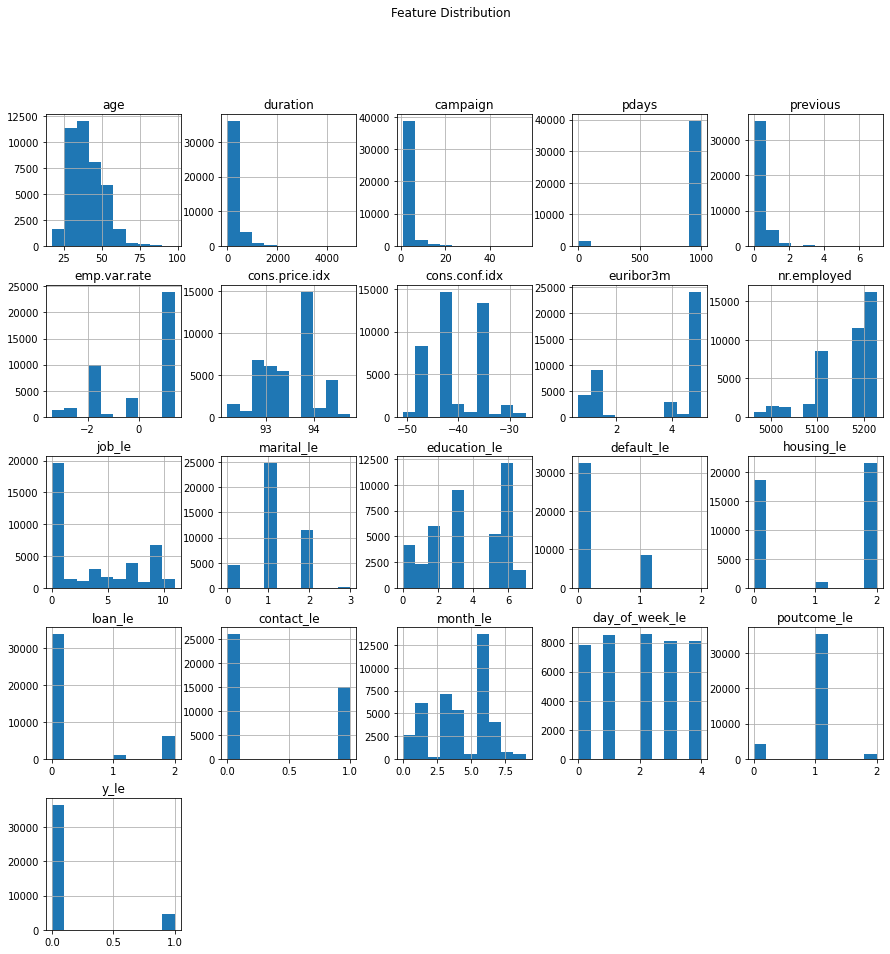

In [ ]:
# Features distribution histograms
data1.hist(figsize=[15,15])
plt.suptitle("Feature Distribution")
plt.show()

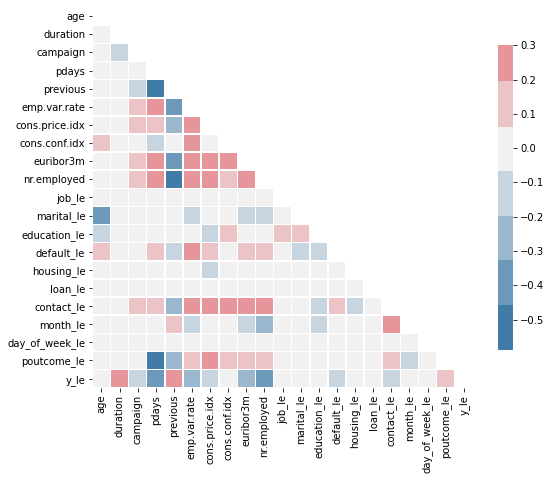

In [ ]:
# correlation matrix
corr =  data1.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(9, 7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, n=9)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .8})
plt.show()

##Cùng nhóm:

poutcome - y

education - job

education - marital

## Khác nhóm:
default - age

duration - y ( do nếu duration=0 thì y=fail)

contact - default 

### Các yếu tố kinh tế xã hội liên quan trực tiếp đến thời điểm cuộc gọi cuối vì các giá trị này được lấy theo thời gian xảy ra cuộc gọi cuối

In [5]:
age = data['age'].values
job = data['job'].values
marital = data['marital'].values
education = data['education'].values
default = data['default'].values
housing = data['housing'].values
loan = data['loan'].values
contact = data['contact'].values
month = data['month'].values
day_of_week = data['day_of_week'].values
duration = data['duration'].values
campaign = data['campaign'].values
pdays = data['pdays'].values
previous = data['previous'].values
poutcome = data['poutcome'].values
emp_var_rate = data['emp.var.rate'].values
cons_price_idx = data['cons.price.idx'].values
cons_conf_idx = data['cons.conf.idx'].values
euribor3m = data['euribor3m'].values
nr_employed = data['nr.employed'].values
y = data['y'].values



In [21]:
gau = data[poutcome=='nonexistent']
gau_y = gau['y'].values
gau_y_no = gau[gau_y=='no']
gau_y_no.shape[0]/gau.shape[0]

0.9116778674465034

In [ ]:
data[default=='yes']
# Default hầu hết là no hoặc unknown vì đây là những khách hàng tiềm năng 
# cho chiến dịch marketing một sản phẩm của ngân hàng

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
21580,48,technician,married,professional.course,yes,no,no,cellular,aug,tue,66,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
21581,48,technician,married,professional.course,yes,yes,no,cellular,aug,tue,133,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
24866,31,unemployed,married,high.school,yes,no,no,cellular,nov,tue,111,2,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no


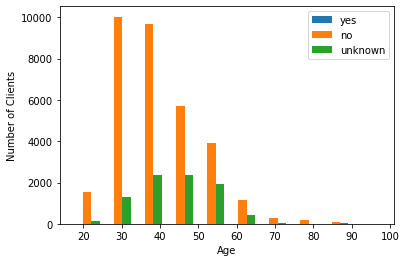

In [ ]:
import matplotlib.pyplot as plt

# AGE - DEFAULT 
_ = plt.hist([age[default=='yes'], age[default=='no'], age[default=='unknown']], label=['yes', 'no', 'unknown'])
plt.xlabel("Age")
plt.ylabel("Number of Clients")
plt.legend()

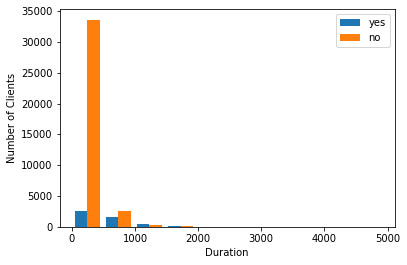

In [ ]:
import matplotlib.pyplot as plt

# DURATION - Y ---> Khong lien quan
#plt.xlim(left=0, right=2000)
_ = plt.hist([duration[y=='yes'], duration[y=='no']], label=['yes', 'no'])
plt.xlabel("Duration")
plt.ylabel("Number of Clients")
plt.legend()

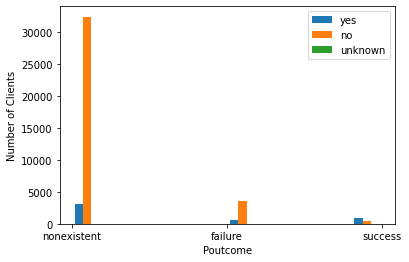

In [ ]:
import matplotlib.pyplot as plt

#POUTCOME - Y
_ = plt.hist([poutcome[y=='yes'], poutcome[y=='no']], label=['yes','no'])
plt.xlabel("Poutcome")
plt.ylabel("Number of Clients")
plt.legend()

In [32]:
import matplotlib.pyplot as plt

# EDUCATION - JOB --- có mối quan hệ với nhau, ví dụ phần lớn student --- university.degree

job_ = ['admin.', 'housemaid', 'blue-collar', 'management', 'unknown', 'technician', 'unemployed', 'retired', 'self-employed', 'entrepreneur', 'student', 'services']
edu_ = ["basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown"]

for i in range(len(job_)):
  print(job_[i])
  gau = data[job==job_[i]]
  edu = gau['education'].values
  for j in range(len(edu_)):
    print(edu_[j])
    gau_ = gau[edu==edu_[j]]
    print(gau_.shape[0]/gau.shape[0])
  print()


admin.
basic.4y
0.0073882172327768185
basic.6y
0.014488581846094799
basic.9y
0.0478794857033199
high.school
0.3194204567261562
illiterate
9.595087315294569e-05
professional.course
0.034830166954519286
university.degree
0.5520053732488965
unknown
0.023891767415083476

housemaid
basic.4y
0.44716981132075473
basic.6y
0.07264150943396226
basic.9y
0.08867924528301886
high.school
0.1641509433962264
illiterate
0.0009433962264150943
professional.course
0.05566037735849057
university.degree
0.1311320754716981
unknown
0.03962264150943396

blue-collar
basic.4y
0.2504862762048844
basic.6y
0.15409552625891507
basic.9y
0.39150637562135293
high.school
0.0948778906418846
illiterate
0.0008644910309055544
professional.course
0.04895180462502702
university.degree
0.010157769613140263
unknown
0.04905986600389021

management
basic.4y
0.03419972640218878
basic.6y
0.029069767441860465
basic.9y
0.05677154582763338
high.school
0.10191518467852258
illiterate
0.0
professional.course
0.030437756497948016
universi

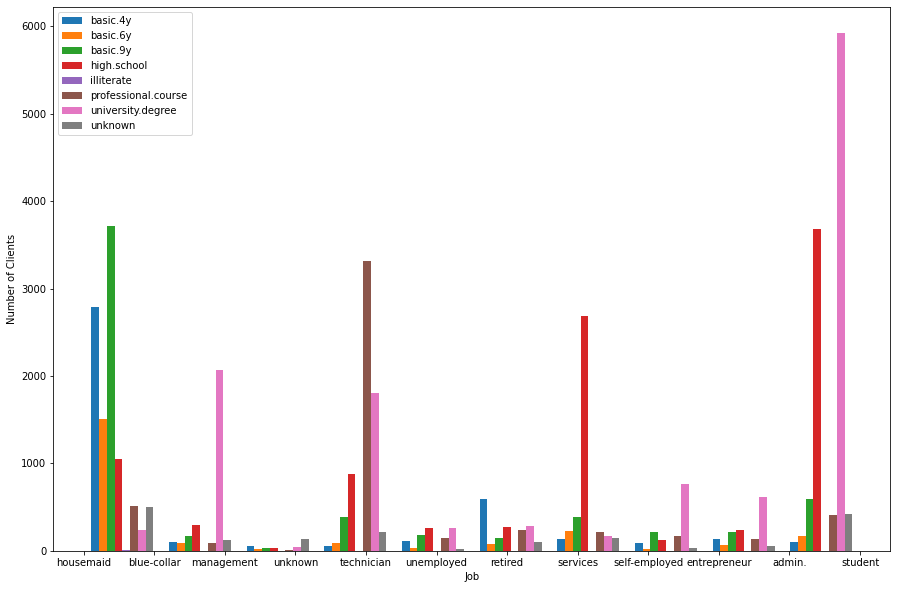

In [ ]:
import matplotlib.pyplot as plt

# EDUCATION - JOB --- có mối quan hệ với nhau, ví dụ phần lớn student --- university.degree
plt.figure(figsize=(15,10))
_ = plt.hist([job[education=='basic.4y'], job[education=='basic.6y'],job[education=='basic.9y'],job[education=='high.school'],job[education=='illiterate'],job[education=='professional.course'],job[education=='university.degree'],job[education=='unknown']], label=["basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown"])
plt.xlabel("Job")
plt.ylabel("Number of Clients")
plt.legend()

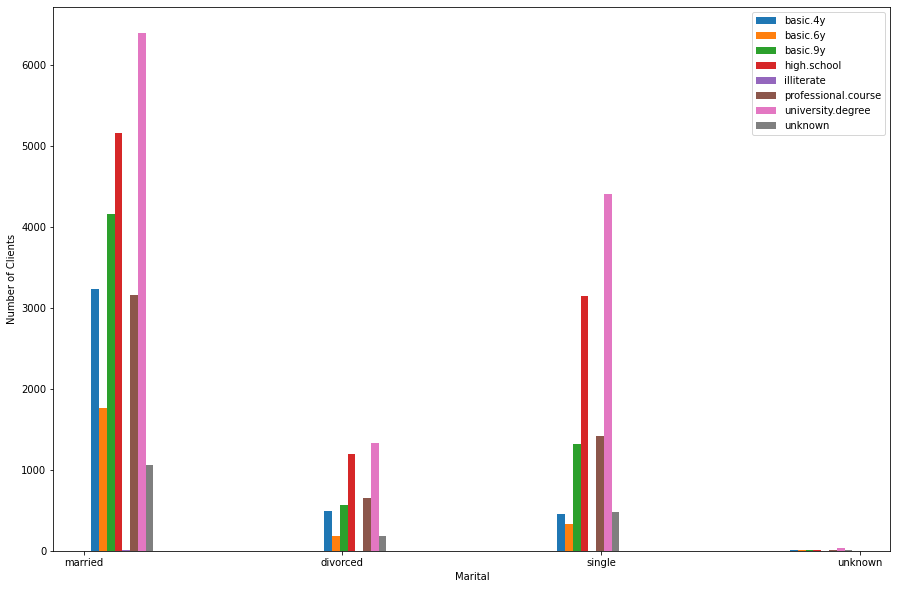

In [ ]:
import matplotlib.pyplot as plt

# EDUCATION - MARITAL  --- xxx
plt.figure(figsize=(15,10))
_ = plt.hist([marital[education=='basic.4y'], marital[education=='basic.6y'],marital[education=='basic.9y'],marital[education=='high.school'],marital[education=='illiterate'],marital[education=='professional.course'],marital[education=='university.degree'],marital[education=='unknown']], label=["basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown"])
plt.xlabel("Marital")
plt.ylabel("Number of Clients")
plt.legend()

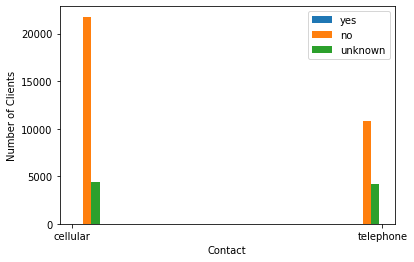

In [ ]:
import matplotlib.pyplot as plt

# CONTACT - DEFAULT ----xxx
_ = plt.hist([contact[default=='yes'], contact[default=='no'], contact[default=='unknown']], label=['yes', 'no', 'unknown'])
plt.xlabel("Contact")
plt.ylabel("Number of Clients")
plt.legend()

- Không thể dự đoán default trong thực tế vì chỉ có dữ liệu của no và unknown
- các chỉ số kinh tế xã hội lấy theo báo cáo có sắn theo thời điểm của cuộc gọi cuối cùng
- housing và loan có thể dự báo dựa trên các chỉ số kinh tế xã hội nhưng không đảm bảo vì các thông số này của mọi người là giống nhau trong từng giai đoạn
- dự đoán y cần tất cả thuộc tính để đạt được độ chính xác tốt
- month, day_of_week, campaign, pdays, previous, poutcome được ghi nhận khi đã xảy ra và là các kết quả hoàn toàn ngẫu nhiên

###Link
https://growingdata.com.au/a-guided-introduction-to-exploratory-data-analysis-eda-using-python/

https://www.kaggle.com/henriqueyamahata/bank-marketing-classification-roc-f1-recall